[0.54569218 0.34279588] [-0.84678378  0.53193724]
[-0.37251764  0.92802511] [-0.37251764 -0.92802511]
[ 0.14876019 -0.9888733 ] [-0.14876019 -0.9888733 ]
[-0.56801695 -0.82301686] [-0.56801695  0.82301686]
[0.01421486 0.99989896] [ 0.01421486 -0.99989896]
[-0.43340209 -0.90120066] [-0.43340209  0.90120066]
[0.08881647 0.99604801] [ 0.08881647 -0.99604801]
[-0.03665897 -0.99932783] [-0.03665897  0.99932783]
[0.35436342 0.93510778] [ 0.35436342 -0.93510778]
[ 0.08302871 -0.99654716] [0.08302871 0.99654716]
[0.40734118 0.91327606] [-0.40734118  0.91327606]
[-0.87511388  0.48391704] [-0.87511388 -0.48391704]
[-0.43040434 -0.9026362 ] [-0.43040434  0.9026362 ]
[ 0.17824106 -0.98398685] [0.17824106 0.98398685]
[0.77486059 0.63213216] [-0.77486059  0.63213216]
[-0.44319335  0.89642604] [-0.44319335 -0.89642604]
[-0.45156052 -0.89224049] [-0.45156052  0.89224049]
[-0.05845988  0.99828976] [-0.05845988 -0.99828976]
[ 0.33220235 -0.94320814] [0.33220235 0.94320814]
[0.74616407 0.66576211] [-0.74

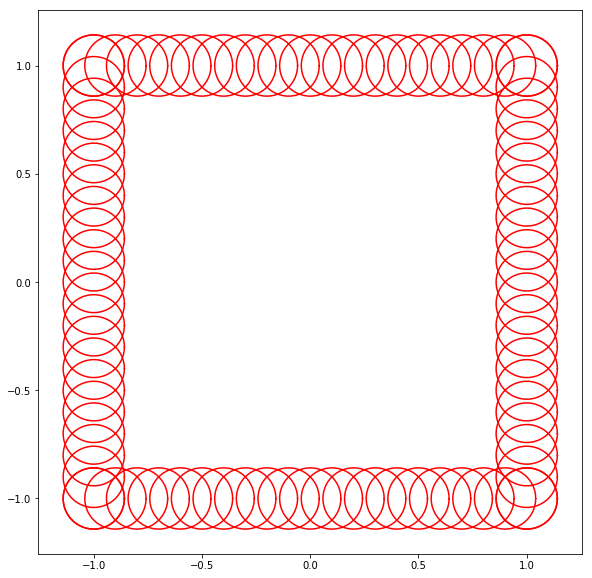

In [30]:
import sys
#sys.path.append('/home/nbuser/library/')

from Polytope import Polytope
from Plane import Plane, Options
from symmetric import *
from far_point import *
from make_cube import *

import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

plt.figure(figsize=(20,10))
plt.gca().set_aspect('equal', adjustable='box')

dim = 2
draw_circles = True

# cube = make_rotated_cube(dim)
# cube = make_cube(dim)
delta = 0.1
radius = np.sqrt(dim) * delta
depth = 0

options = Options(reflection = "sphere", \
                        delta = delta, radius = radius, depth = depth)
cube = make_cube(dim, options)
# zero = get_far_point(cube)
# print(np.linalg.norm(zero))
# cube.point = zero
# cube.point = np.zeros(dim)

centroid, lines = cube.approximate_centroid(iterations = 100)
# lines = cube.cur_lines__

def plot_line(xs, vec, b):
    return b/vec[1] - (vec[0] * xs) / vec[1]

def plot_all_lines(polytope):
    for p in polytope.planes:
        xs = np.arange(-3,3, 0.1)
        ys = plot_line(xs, p.perp_vec, p.b)
        plt.plot(xs, ys)

def circ(x, y, r, phi):
  return (x + r * np.cos(phi), y + r*np.sin(phi))

def plot_circle(x, y, r):
    phis = np.arange(0,6.28,0.01)
    plt.plot(*circ(x, y, r, phis), c = 'r')

if draw_circles:
    for i in range(-1*int(1/delta), int(1/delta)+1):
        plot_circle(-1 - depth, i*delta, radius)
        plot_circle(1 + depth, i*delta, radius)
        plot_circle(i*delta, 1 + depth, radius)
        plot_circle(i*delta, -1 - depth, radius)

xx = 0
yy = 1
col = ['blue', 'red', 'black', 'green', 'purple']
c = 0

print("distance from centroid", np.linalg.norm(centroid))
print("centroid approximation", centroid)


(-1.2555633035321885,
 1.2555634828929998,
 -1.255563065879225,
 1.255563424600734)

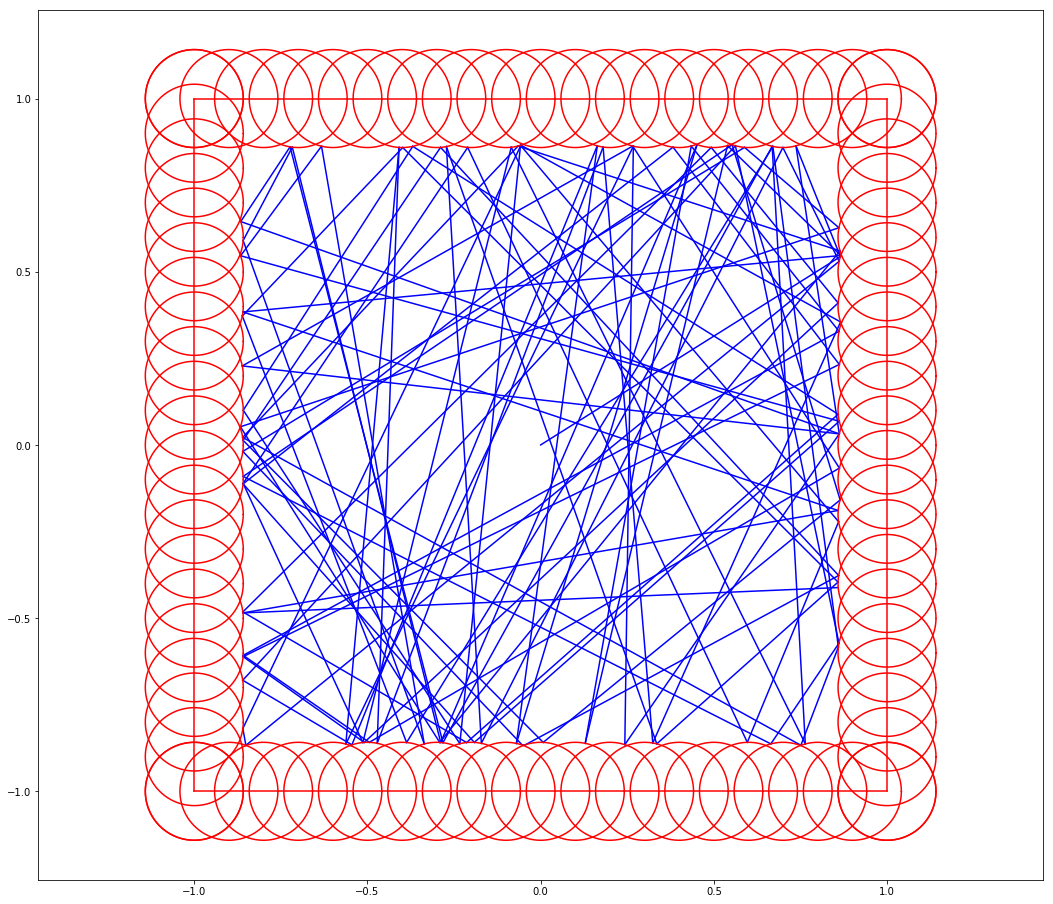

In [32]:
plt.figure(figsize=(18, 16))

left = 0
right = 100-1
for i in range(left, right):
    pt1 = [lines[i][0][xx], lines[i][0][yy]]
    pt2 = [lines[i][1][xx], lines[i][1][yy]]
    # pts.append(lines[i][0])
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color = 'blue')
plt.plot([-1,-1],[-1,1], color = 'red')
plt.plot([1,1],[-1,1], color = 'red')
plt.plot([-1,1],[1,1], color = 'red')
plt.plot([-1,1],[-1,-1], color = 'red')

for i in range(-1*int(1/delta), int(1/delta)+1):
    plot_circle(-1 - depth, i*delta, radius)
    plot_circle(1 + depth, i*delta, radius)
    plot_circle(i*delta, 1 + depth, radius)
    plot_circle(i*delta, -1 - depth, radius)
plt.axis('equal')

In [3]:
# a = np.array([-0.86275538, 0.36588383])
# b = np.array([ 0.86384454, -0.86176794])
# c = np.array([ 0.86384454, -0.86176794])
# d = np.array([-0.85953002, -0.98362367])
# d1 = b - a
# d2 = d - c
# print(a, b, c, d, d1, d2 / np.linalg.norm(d2))

[-0.86275538  0.36588383] [ 0.86384454 -0.86176794] [ 0.86384454 -0.86176794] [-0.85953002 -0.98362367] [ 1.72659992 -1.22765177] [-0.99750955 -0.07053154]


In [7]:
# print(cube.get_plane_hit(b, d2, -1))

NO INTERSECTION
(array([-0.85953002, -0.98362367]), array([0.98698287, 0.16082539]), 1)


(-1, -0.8)

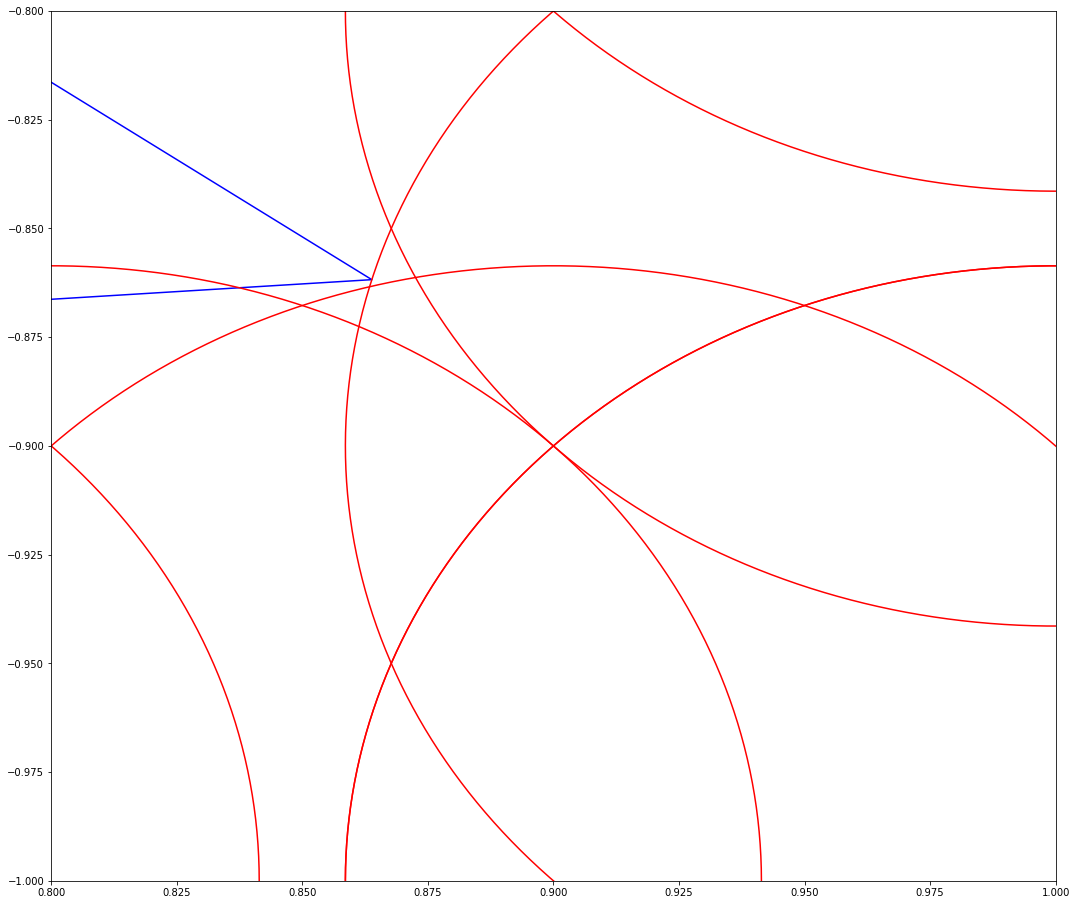

In [5]:
# plt.figure(figsize=(18, 16))

# plt.plot([a[0], b[0], c[0], d[0]], [a[1], b[1], c[1], d[1]], color = 'blue')

# for i in range(-1*int(1/delta), int(1/delta)+1):
#     plot_circle(-1 - depth, i*delta, radius)
#     plot_circle(1 + depth, i*delta, radius)
#     plot_circle(i*delta, 1 + depth, radius)
#     plot_circle(i*delta, -1 - depth, radius)
# plt.xlim(0.8,1)
# plt.ylim(-1,-0.8)